In [1]:
##Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 


In [2]:
##Mnist dataset load
from tensorflow.keras.datasets import mnist 
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

2


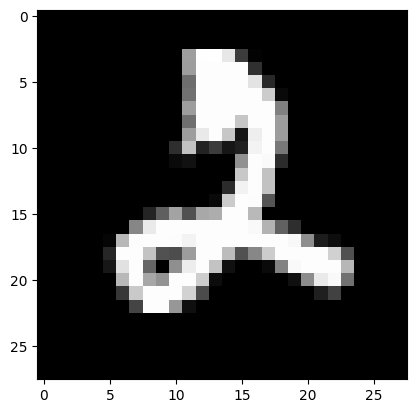

In [26]:
##Visualize images
i = np.random.randint(0,59999)
print(y_train[i])
plt.imshow(X_train[i],cmap='gray')
plt.show()

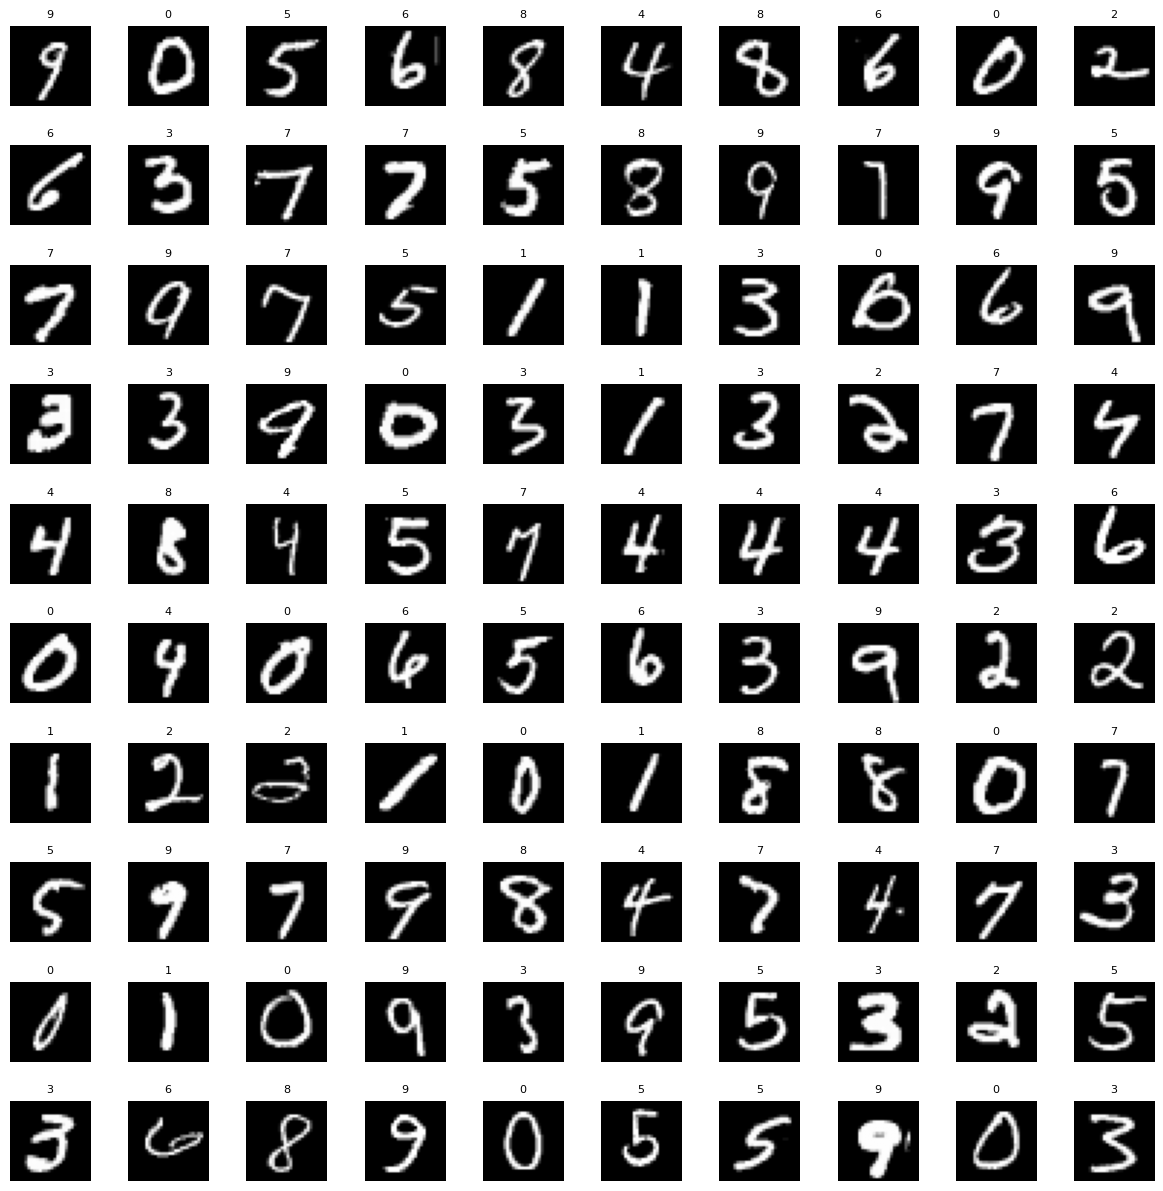

In [34]:
width = 10
height = 10
fig,axis = plt.subplots(height,width,figsize=(15,15))
axis = axis.ravel()
for i in range(0,width*height):
    index = np.random.randint(0,59999)
    axis[i].imshow(X_train[index],cmap='gray')
    axis[i].set_title(y_train[index],fontsize=8)
    axis[i].axis('off')
plt.subplots_adjust(hspace=.493)


In [37]:
X_train[0].min(),X_train[0].max()

(0.0, 1.0)

In [ ]:
##Normalizing images between 0-255
X_train = X_train/255. 
X_test = X_test/255.

In [38]:
X_train.shape,X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [40]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
X_train.shape

(60000, 784)

In [41]:
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
X_test.shape

(10000, 784)

In [96]:
##Building and training the linear autoencoder
#784-284-64-32-64-128-784
input_img = Input(shape=(784,))
encoded = Dense(units = 128,activation='relu')(input_img)
encoded = Dense(units=64,activation='relu')(encoded)
encoded = Dense(units=32,activation='relu')(encoded)

decoded = Dense(units=64,activation='relu')(encoded)
decoded = Dense(units=128,activation='relu')(decoded)
decoded = Dense(units=784,activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_img,outputs=decoded)
autoencoder.summary()



Model: "functional_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
autoencoder.input

<KerasTensor shape=(None, 784), dtype=float32, sparse=False, ragged=False, name=keras_tensor_158>

In [98]:
autoencoder.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [99]:
autoencoder.fit(X_train,X_train,epochs=50)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0097 - loss: 0.2084
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0113 - loss: 0.1147
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0116 - loss: 0.1023
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0139 - loss: 0.0969
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0127 - loss: 0.0940
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0130 - loss: 0.0920
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0123 - loss: 0.0908
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0119 - loss: 0.0896
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0127 - loss: 0.0887
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0137 - loss: 0.0880
Epoch 11/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.0138 - loss: 0.0871
Epoch 12/50
1875/1875 ━━━━━━━━

In [100]:
#Encoding the test images 
autoencoder.input

<KerasTensor shape=(None, 784), dtype=float32, sparse=False, ragged=False, name=keras_tensor_158>

In [63]:
encoded.summary()

AttributeError: 'KerasTensor' object has no attribute 'summary'

In [102]:
encoder = Model(inputs=autoencoder.input,outputs=autoencoder.get_layer('dense_44').output)


In [103]:
encoder.summary()

Model: "functional_42"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │         2,080 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,816 (432.88 KB)

 Trainable params: 110,816 (432.88 KB)

 Non-trainable params: 0 (0.00 B)

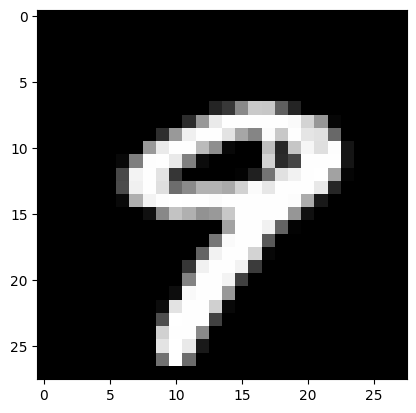

In [104]:
plt.imshow(X_test[9].reshape(28,28),cmap='gray')

In [105]:
encoded_image = encoder.predict(X_test[9].reshape(1,-1)) ##all calculation regarding NN, multiplication function, activation func


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


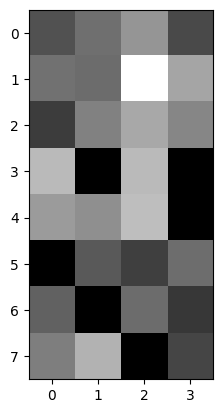

In [106]:
plt.imshow(encoded_image.reshape(8,4),cmap='gray')

In [107]:
##Decode the images
autoencoder.summary()

Model: "functional_41"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 667,154 (2.54 MB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 444,770 (1.70 MB)

In [108]:
##need to create a custom input layer as decoder layer's input is from encoded layer. we need to separate this portion so that we can send the encoded image here
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = (autoencoder.get_layer('dense_45'))(input_layer_decoder)
decoder_layer2 = (autoencoder.get_layer('dense_46'))(decoder_layer1)
decoder_layer3 = (autoencoder.get_layer('dense_47'))(decoder_layer2)
decoder = Model(inputs = input_layer_decoder, outputs=decoder_layer3)
decoder.summary()


Model: "functional_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,568 (435.81 KB)

 Trainable params: 111,568 (435.81 KB)

 Non-trainable params: 0 (0.00 B)

In [109]:
decoded_image = decoder.predict(encoded_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


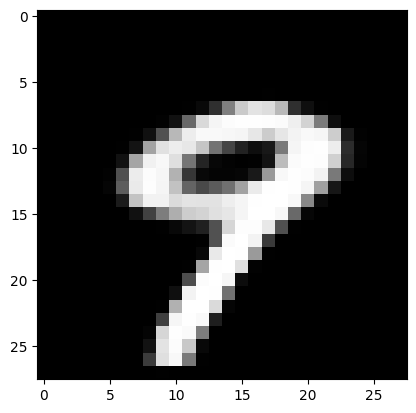

In [110]:
plt.imshow(decoded_image.reshape(28,28),cmap='gray')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


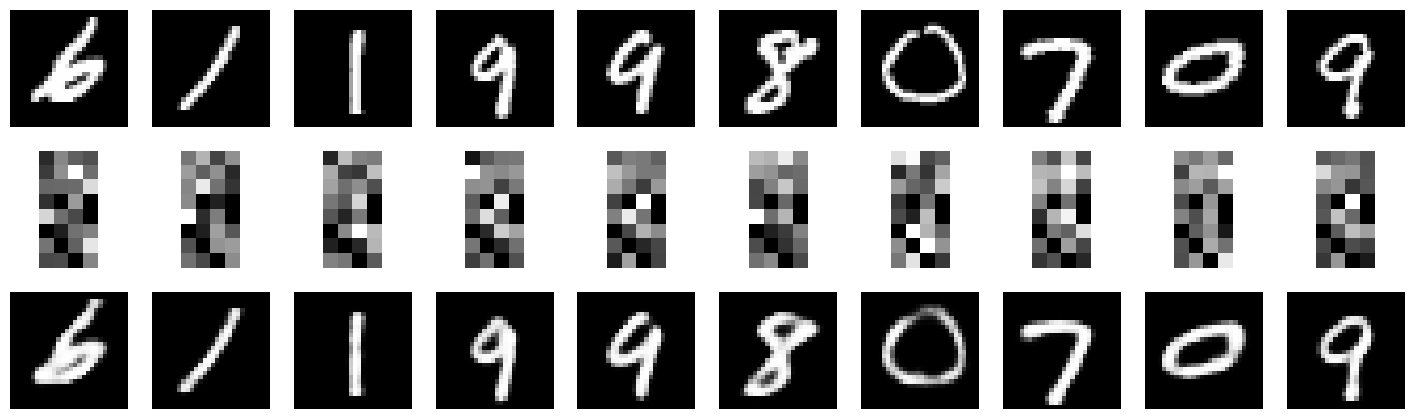

In [127]:
n_image = 10
test_images = np.random.randint(0,X_test.shape[0]-1,n_image)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
    ax = plt.subplot(10,10,i+1)
    plt.imshow(X_test[image_index].reshape(28,28),cmap='gray')
    plt.axis('off')

    ax = plt.subplot(10,10,i+1+n_image)
    encoded_image = encoder.predict(X_test[image_index].reshape(1,-1))
    plt.imshow(encoded_image.reshape(8,4),cmap='gray')
    plt.axis('off')

    ##Decoded Images

    ax = plt.subplot(10,10,i+1+n_image*2)
    decoded_images = decoder.predict(encoded_image).reshape(28,28)
    plt.imshow(decoded_images,cmap='gray')
    plt.axis('off')